<a href="https://colab.research.google.com/github/lbiedma/mysfamaf2025/blob/main/codigos/practico5/p5_Ejercicio_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio 1a)**

Desarrolle un método para generar una variable aleatoria
cuya densidad de probabilidad es:

$$
f(x) = \left\{
\begin{array}{ll}
\displaystyle\frac{x-2}{2}   & \mbox{ si } 2 \leq x \leq 3 \\
\displaystyle\frac{2 - \frac{x}{3}}{2} & \mbox{ si } 3 \leq x \leq 6 \\
0 & \mbox{ en otro caso }
\end{array}
\right.
$$

La acumulada se define como:
$$
F(x) = \int_{-\infty}^x f(t) \, dt
$$

Para cada uno de los casos la calculamos:

* $ x < 2 $

  Como $f(x) = 0$ para $x < 2$ entonces $F(x)=0$

* $2 \leq x \leq 3$
$$
F(x) = \int_{2}^x \frac{t-2}{2} \, dt = \int_{2}^x \frac{t}{2}-1 \, dt =  \left[ \frac{t^2}{4}-t \right]_{2}^x = \frac{x^2}{4}-x+1
$$

* $3 \leq x \leq 6$

  Primero:
$$
F(3) = \frac{3^2}{4}-3+1=\frac{1}{4}
$$

  Entonces:
$$
F(x) = F(3) + \int_{3}^x \frac{2 - \frac{t}{3}}{2} \, dt = \frac{1}{4} + \int_{3}^x  1 - \frac{t}{6} \, dt
\\
= \frac{1}{4} + \left[ t - \frac{t^2}{12} \right]_{3}^x=\cdots=\frac{-x^2}{12}+x-2
$$

* $x > 6$
$$
F(6) = \frac{-6^2}{12}+6-2 = 1
$$
Entonces $F(x) = 1$

Por lo tanto la acumulada queda:

$$
F(x) = \begin{cases}
0 & \text{if } x < 2, \\
\displaystyle\frac{x^2}{4}-x+1 & \text{if } 2 \leq x \leq 3, \\
\displaystyle \frac{-x^2}{12}+x-2 & \text{if } 3 \leq x \leq 6, \\
1 & \text{if } x > 6.
\end{cases}
$$

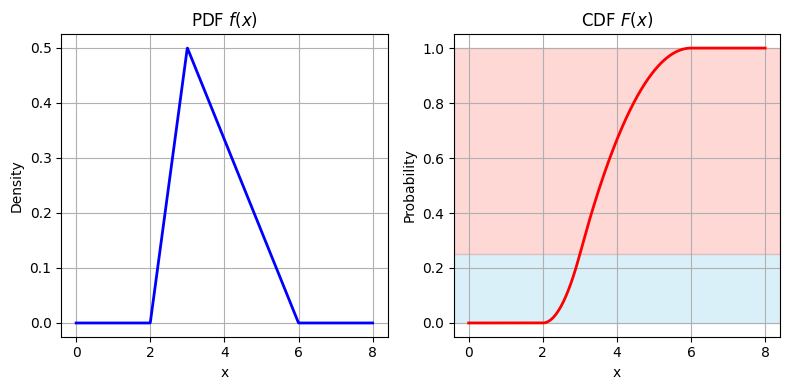

In [ ]:
#@title plots

import numpy as np
import matplotlib.pyplot as plt

def pdf(x):
    x = np.asarray(x, dtype = float)
    return np.piecewise(
        x,
        [x < 2, (2 <= x) & (x <= 3), (3 < x) & (x <= 6), x > 6],
        [0, lambda x: (x - 2) / 2, lambda x: (2 - x/3) / 2, 0]
    )

def cdf(x):
    x = np.asarray(x, dtype = float)
    return np.piecewise(
        x,
        [x < 2, (2 <= x) & (x <= 3), (3 <= x) & (x <= 6), x > 6],
        [0, lambda x: x**2/4-x+1 , lambda x: x - (x**2)/12 - 2, 1])

# Generate x values
x = np.linspace(0, 8, 1000)

# Plot PDF and CDF
plt.figure(figsize=(8, 4))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf(x), 'b-', linewidth=2)
plt.title('PDF $f(x)$')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf(x), 'r-', linewidth=2)
plt.axhspan(0, 0.25, color='skyblue', alpha=0.3, label='2 < x < 3 (F: 0→0.25)')
plt.axhspan(0.25, 1, color='salmon', alpha=0.3, label='3 < x < 6 (F: 0.25→1)')
plt.title('CDF $F(x)$')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)

plt.tight_layout()
plt.show()

Como la funcion cambia en $x=3$ el <mark>valor de quiebre para el algoritmo sera $F(3)=0.25$</mark>:

In [ ]:
cdf(3)

array(0.25)

Calculemos las inversas de cada parte de la funcion.
* Si <mark>$0 \leq u \leq 0.25$</mark>  (para las $2 \leq x \leq 3$) tendremos:
$$
\frac{x^2}{4}-x+1=u\implies \frac{x^2}{4}-x+1-u=0
$$

  Por bhaskara:

  $$
  \frac{1\pm \sqrt{1-4\cdot 1/4\cdot (1-u)}}{1/2}=2\pm 2\sqrt{u}
  $$

  Como los valores de generado en este caso van de $2$ a $3$ elegimos la solucion $2+ 2\sqrt{u}$

* Si <mark>$0.25 \leq u \leq 1$</mark>  (para las $3 \leq x \leq 6$) tendremos:
$$
\frac{-x^2}{12}+x-2=u\implies \frac{-x^2}{12}+x-2-u=0
$$

  Por bhaskara:

  $$
  \frac{-1\pm \sqrt{1-4\cdot 1/12\cdot (2+u)}}{-1/6}=6\pm 6\sqrt{1-4\cdot 1/12\cdot (2+u)}=6\pm 2\sqrt{9(1- 1/3\cdot (2+u))}=6\pm 2\sqrt{9-6-3u}\\=6\pm 2\sqrt{3(1-u)}
  $$

  Como los valores de generado en este caso van de $3$ a $6$ elegimos la solucion $6- 2\sqrt{3(1-u)}$

In [ ]:
#@title transformada inversa de f
import random
def f_tinv():
  u = random.random()
  if u < 0.25:
    return 2 + 2*np.sqrt(u)
  else:
    return 6 - 2*np.sqrt(3*(1-u))

Chequeamos que la distribucion generada sigue la probabilidad de densidad original.

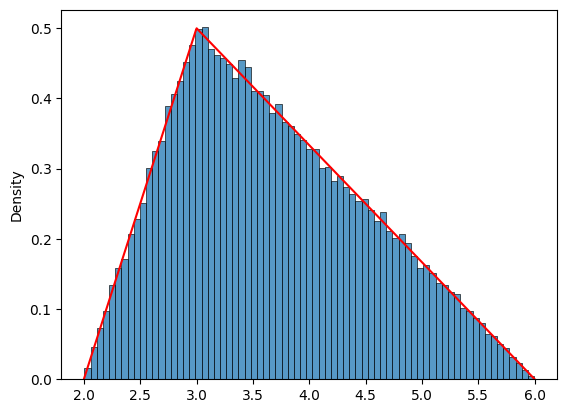

In [ ]:
#@title histplot vs pdf
import seaborn as sns
x = np.linspace(2, 6, 1000)
n_sim = int(1e5)
s = np.empty(n_sim)
for i in range(n_sim):
  s[i]=f_tinv()
sns.lineplot(x=x, y=pdf(x),color='red')
sns.histplot(s, stat = 'density')
plt.show()